In [ ]:
# https://www.kaggle.com/strakul5/principal-component-analysis-of-pokemon-data

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("C:/Users/aozde/OneDrive/Documents/Columbia/Week-22/Pokemon.csv")

In [13]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [15]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [16]:
list(df.columns)

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [17]:
list(df.columns.values)

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [46]:
df.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '790', '791', '792', '793', '794', '795', '796', '797', '798', '799'],
      dtype='object', length=800)

* https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/

* Rename the column # to id.Additionaly, create a list,cols,of columns we will consider later.in this list include the columns
* 'HP','Attack','Defense','Sp.Atk','Sp.Def','Speed'

In [18]:
# https://cmdlinetips.com/2019/03/how-to-select-one-or-more-columns-in-pandas/
#https://inmachineswetrust.com/posts/exploring-pokemon-dataset/

In [87]:
# Renaming one column for clarity
columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns
df.head(1)


# Selecting columns to consider  as alist
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']



['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [88]:
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])

print(df_scaled[:,0].mean())  # zero (or very close)
print(df_scaled[:,0].std())  # 1 (or very close)


-2.486899575160351e-16
1.0


In [81]:
### GRADED

### YOUR SOLUTION HERE
#df= df.rename(index=str, columns={"#": "id"})
#df=df.rename(columns = {'#':'id'})
#df.head()

###
### YOUR CODE HERE
###

In [55]:
#df[df.duplicated('id', keep=False)].head()

In [56]:
#df.drop_duplicates('id', keep='first', inplace=True)

In [57]:
#https://ichi.pro/tr/python-pandas-dataframe-i-indeksleme-ve-dilimleme-261108134871414

In [58]:
#List of labels. Note using [[]] returns a DataFrame.


In [59]:
df['HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [60]:
df.loc[:,'HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [61]:
df.iloc[:]['HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [79]:
#cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
#cols1 =df[:][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
#print(cols)
#type(cols)

     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0    45      49       49       65       65     45
1    60      62       63       80       80     60
2    80      82       83      100      100     80
3    80     100      123      122      120     80
4    39      52       43       60       50     65
..   ..     ...      ...      ...      ...    ...
795  50     100      150      100      150     50
796  50     160      110      160      110    110
797  80     110       60      150      130     70
798  80     160       60      170      130     80
799  80     110      120      130       90     70

[800 rows x 6 columns]


pandas.core.frame.DataFrame

In [63]:
#cols =df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
#cols.head()

In [64]:
#https://medium.com/deep-dive-into-exploratory-data-analysis/eda-pokemon-visualization-58102b68e2d7
#https://rpubs.com/jeryl_goh/545244
#https://anhqle.github.io/gotta-plot-them-all/

In [65]:
#cols_new= df.copy()
#cols_new.drop(['id','Name','Type 1','Type 2','Total','Generation','Legendary'],1,inplace=True)
#cols_new.head()

* We can scale our data by using the function StandardScaler from sklearn imported above. You can find the documentation for this function here.

* Instantiate a scaler, scaler, by using the function StandardScaler. Make sure that you fit the scaler only to the columns we are interested on (the ones listed in cols).

* Next, apply the method transform to your scaler by passing df[cols] as an argument. Redefine this new object to be df_scaled

In [66]:
#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/
#https://www.codegrepper.com/code-examples/python/pandas+join+with+different+column+names
#https://thispointer.com/pandas-merge-dataframes-on-specific-columns-or-on-index-in-python-part-2/

In [72]:
?pd.concat

In [97]:
#pd.merge(df,cols)

In [98]:
pca = PCA(n_components=0.8)  
#Fit the model
pca.fit(df_scaled)
#Apply dimesionality reduction and obtain a new dataframe
pcscores = pd.DataFrame(pca.transform(df_scaled))
#Renaming columns
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [99]:
pcscores.head()

,PC1,PC2,PC3,PC4
0,-1.556375,-0.021482,0.666504,0.184176
1,-0.362867,-0.050269,0.667913,0.269254
2,1.280152,-0.062720,0.623914,0.331391
3,2.620916,0.704263,0.995538,-0.199321
4,-1.758284,-0.706179,0.411454,-0.268602


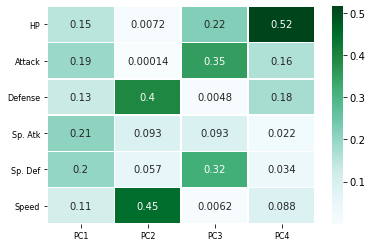

In [100]:
load_sqr = loadings**2


ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
#Setting the ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)
plt.show() 

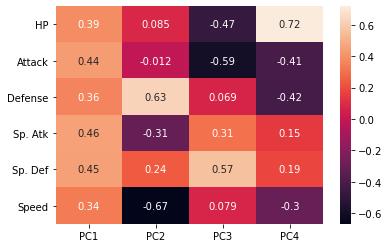

In [101]:
ax = sns.heatmap(loadings.transpose(),  annot=True)

In [102]:
# Create labels based on Type 1
labels = set(df['Type 1'])
df['type'] = df['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
df = df.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']

# Biplots
def make_plot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=6, palette='muted')

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')

    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))

Question 3:
10 points

* Using the function make_plot above, create a biplot. Set the argument pcscores equal to pc_types, loadings equal to loadings, xval equal to 2, yval equal to 3 and max_arrow equal to 0.3.

* Save your image as plot4.png inside the results folder.

In [95]:
# https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
# http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

IndexError: list index out of range

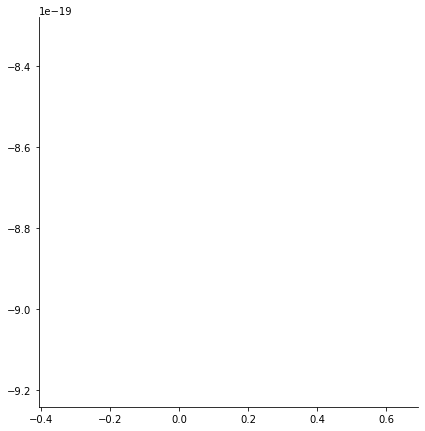

In [96]:
### GRADED 


### YOUR SOLUTION HERE
# Actually make a biplot (PC3 vs PC4)
make_plot(pc_types, loadings, 2, 3, max_arrow=0.3)
result=


###
### YOUR CODE HERE
###

Question 4:
10 points

Use the sort_values function to sort the pc_types dataframe by PC4 in descending order. Extract only the first two rows and assign those to the dataframe best_pc4.

Use best_pc4 to filter the rows of df using the function loc. Assign the result to df_best_pc4

In [ ]:
### GRADED 


### YOUR SOLUTION HERE
best_pc4 =  None
df_best_pc4 = None

###
### YOUR CODE HERE
###


In [ ]:
df.sort_values(by='HP', ascending=False)[:2]

Question 5:
5 points

Use the sort_values function to sort the pc_types dataframe by PC2 in descending order. Extract only the first row and assign those to the dataframe best_pc2.

Next, use the sort_values function to sort the pc_types dataframe by PC3 in descending order. Extract only the first row and assign those to the dataframe best_pc3.

In [ ]:
### GRADED 


### YOUR SOLUTION HERE
best_pc2 =  None
best_pc3 = None

###
### YOUR CODE HERE
###

In [ ]:
print(best_pc2)
print(best_pc3)

In [ ]:
df.loc[230]

Question 6:
10 points

* Use the function make_plot above, create a biplot. Set the argument pcscores equal to pc_types, loadings equal to loadings, xval equal to 1, yval equal to 2 and max_arrow equal to 0.3.

* Save your image as plot7.png inside the results folder.

In [ ]:
### GRADED 


### YOUR SOLUTION HERE

###
### YOUR CODE HERE
###

In [ ]:
import quantecon as qe
import numpy as np

Question 7:
5 points

* Let's begin with a very simple example. Define a tuple, prob with probabilities in [0,1] with entries 0.3 and 0.7. Next, use the NumPy function cumsum to convert your probabilities into a cumulative distribution function. Assign this to the variable cdf.

In [ ]:
### GRADED 


### YOUR SOLUTION HERE
prob = None
cdf = None
###
### YOUR CODE HERE
###

qe.random.draw(cdf, 10)   # generate 10 independent draws from our cdf

Question 8:
15 points

* Next, let's try to define our own function to simulate a simple Markov chain process.

* Define a function mc_sample_path that takes three arguments:

* A stochastic matrix P
* A cumulative distribution function, cdf. Set this argument equal to None by default
* An integer, sample_size. Set this argument equal to 1000 by default
* Your function should execute the following steps:

* Convert P to a Numpy array. Use the function asarray
* Create a new Numpy array X with shape equal to sample_size and type int, without initializing entries. For this, use the function empty.
* Convert each row of P into a cumulative distribution function. You can achieve this using a list comprehension.
* If cdf is not None, use the function draw from quantecon on cdf using the NumPy function cumsum to generate an initial state X_0. If cdf is None set the initial state X_0 = 0.
* Set the first entry of X equal to X_0.
* Use a for loop to simulate your sample_size -1 draws. HINT: the following state can be computed via X[t+1] = qe.random.draw(P_dist[X[t]])
* Your function should return one minus the mean of the array X.

In [ ]:
### GRADED 


### YOUR SOLUTION HERE
def mc_sample_path():
    return
###
### YOUR CODE HERE
###

In [ ]:
X = mc_sample_path(P, sample_size=100000) 
X

In [ ]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=100000)
np.mean(X == 0)

In [ ]:
%time mc_sample_path(P, sample_size=5000000) # Our version

In [ ]:
%time mc.simulate(ts_length=5000000) # qe version

In [ ]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

Question 9:
* 10 points
* 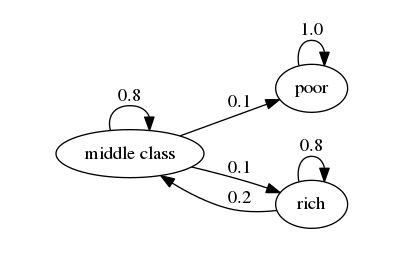

* Imagine now that transition probailities for wealth of set of households get updated like the following.



* Define a new stochastic matrix for this problem like in the example above, and assign it to the variable P. Will the stochastic matrix still be reducible? Assign the boolean value to ans10.

In [ ]:
### GRADED 


### YOUR SOLUTION HERE
ans10 = None
###
### YOUR CODE HERE
###

In [28]:
pokedex = df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]

statistics = pd.merge(df,pokedex, on='id').loc[:, ['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed',
          'total']]

KeyError: "['legendary', 'type 2', 'generation', 'type 1', 'name'] not in index"